In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
%matplotlib inline 

In [3]:
sns.set_theme()

In [4]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


# ***Numerical Plots***
* Distribution: Histogram, KDE Kernel Density Estimate, Displot 
* Bar plot
* Count plot
* Facet plot: tạo ra 1 lưới 2d gồm các bảng được xác định bởi các biến tạo thành các hàng và cột
* Box plot: Phương pháp để mô tả bằng đồ thị các nhóm dữ liệu số thông qua các phần tử của chúng
* Join plot
* Pair plot
* Heat Map : Một kĩ thuật trực quan hoá dữ liệu cho thấy cường độ của một hiện tượng là màu sắc ở hai chiều

### ***Distribution plot***

In [7]:
tip_df = sns.load_dataset("tips")

In [8]:
tip_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


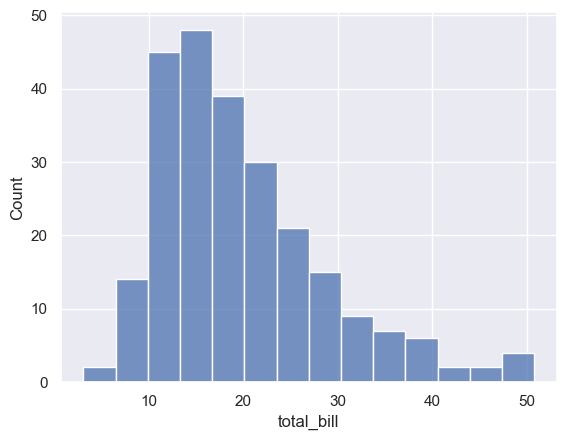

In [9]:
sns.histplot(data = tip_df['total_bill']);

In [10]:
tip_df['total_bill'].value_counts().sort_values(ascending = True)

total_bill
16.47    1
26.41    1
11.24    1
15.06    1
18.35    1
        ..
20.29    2
20.69    2
21.01    2
15.69    2
13.42    3
Name: count, Length: 229, dtype: int64

### ***KDE plot***

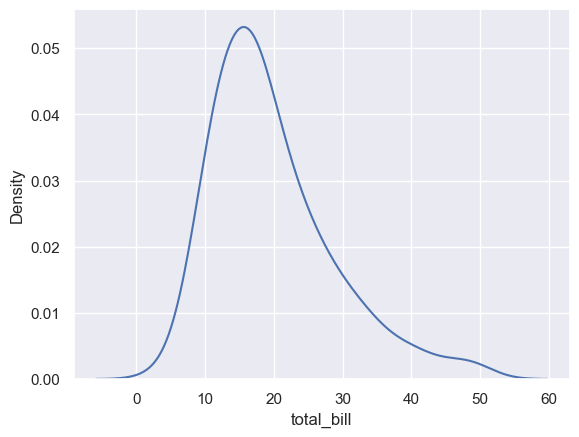

In [12]:
sns.kdeplot(data = tip_df['total_bill']);

### ***Displot***

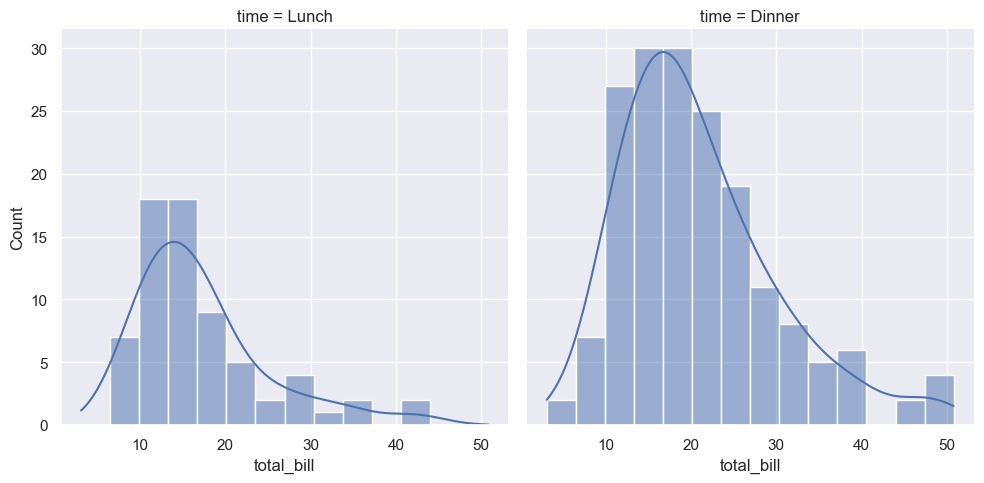

In [14]:
sns.displot(data = tip_df, x = 'total_bill' , col = "time" , kde = True );

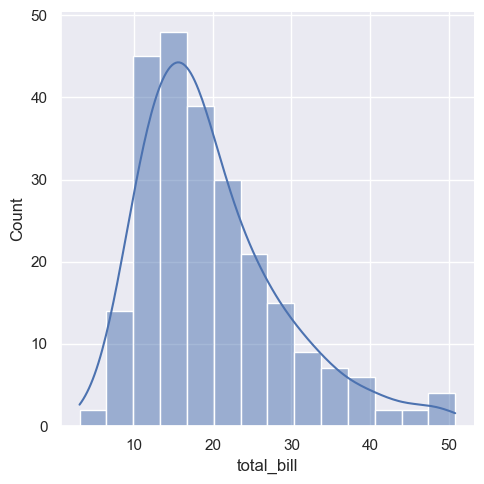

In [15]:
sns.displot(data = tip_df['total_bill'] , kde = True );

<Axes: xlabel='sex', ylabel='tip'>

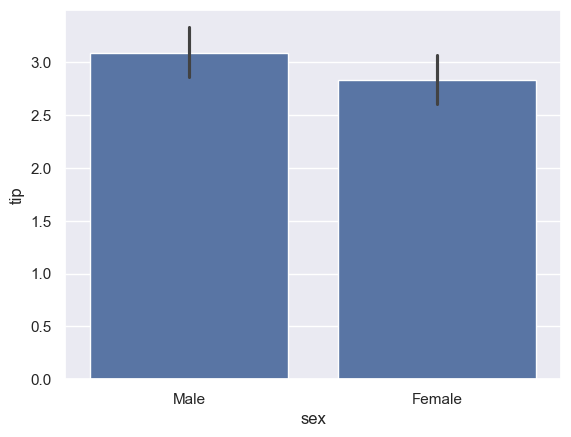

In [16]:
sns.barplot(data = tip_df, x = 'sex' , y = 'tip' , estimator = np.mean )

### ***Count plot***

In [18]:
tip_df['sex'].count()

244

### ***Box plot*** 

<Axes: xlabel='day', ylabel='total_bill'>

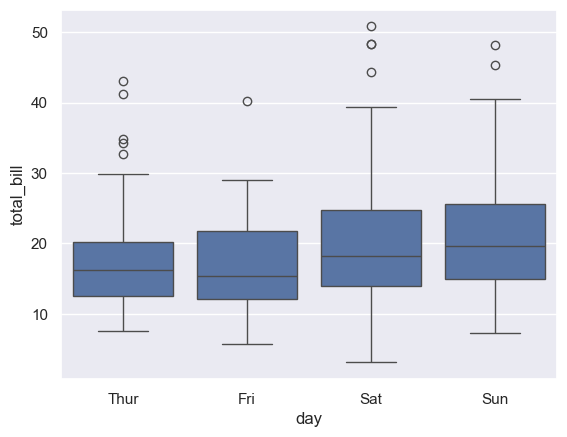

In [38]:
sns.boxplot(data = tip_df , x = 'day' , y = 'total_bill')

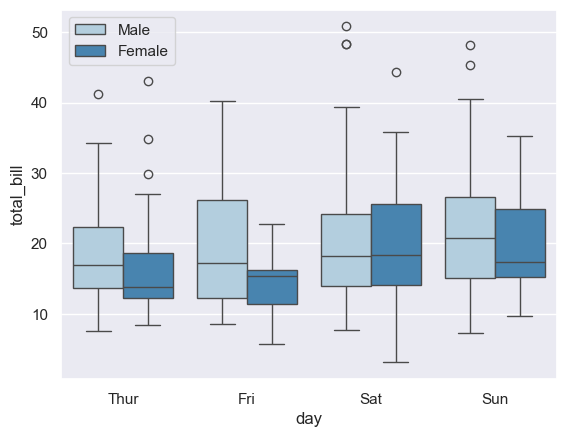

In [64]:
sns.boxplot(data = tip_df , x = 'day' , y = 'total_bill' , hue = 'sex' , palette = "Blues");

plt.legend(loc = 0)

### ***Facet grid*** 

In [69]:
tip_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


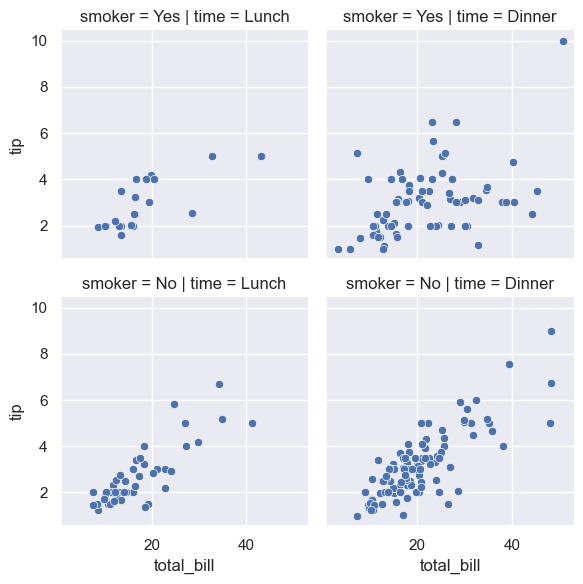

In [79]:
tip_fg = sns.FacetGrid(data = tip_df , row = 'smoker' , col = 'time')
tip_fg.map(sns.scatterplot ,'total_bill' ,'tip');

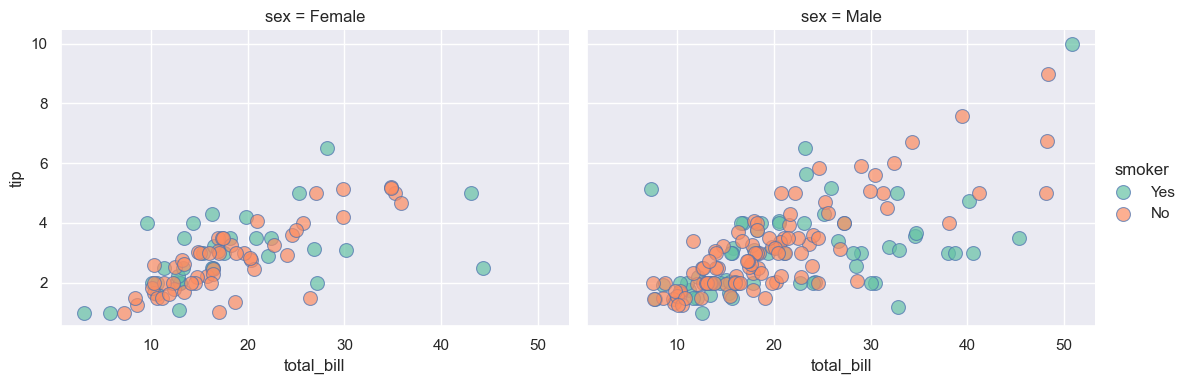

In [121]:
kws = dict(s = 100, alpha = 0.7 , edgecolor = 'b') # kích thước chấm tròn , độ đậm nhạt , màu viền 
new_fg = sns.FacetGrid(data = tip_df , col = 'sex' ,
                      hue = 'smoker', 
                        col_order = ['Female', 'Male'] , 
                       palette = 'Set2', 
                      height = 4 , aspect = 1.4);
new_fg.map(sns.scatterplot , 'total_bill' , 'tip', **kws);  
new_fg.add_legend()

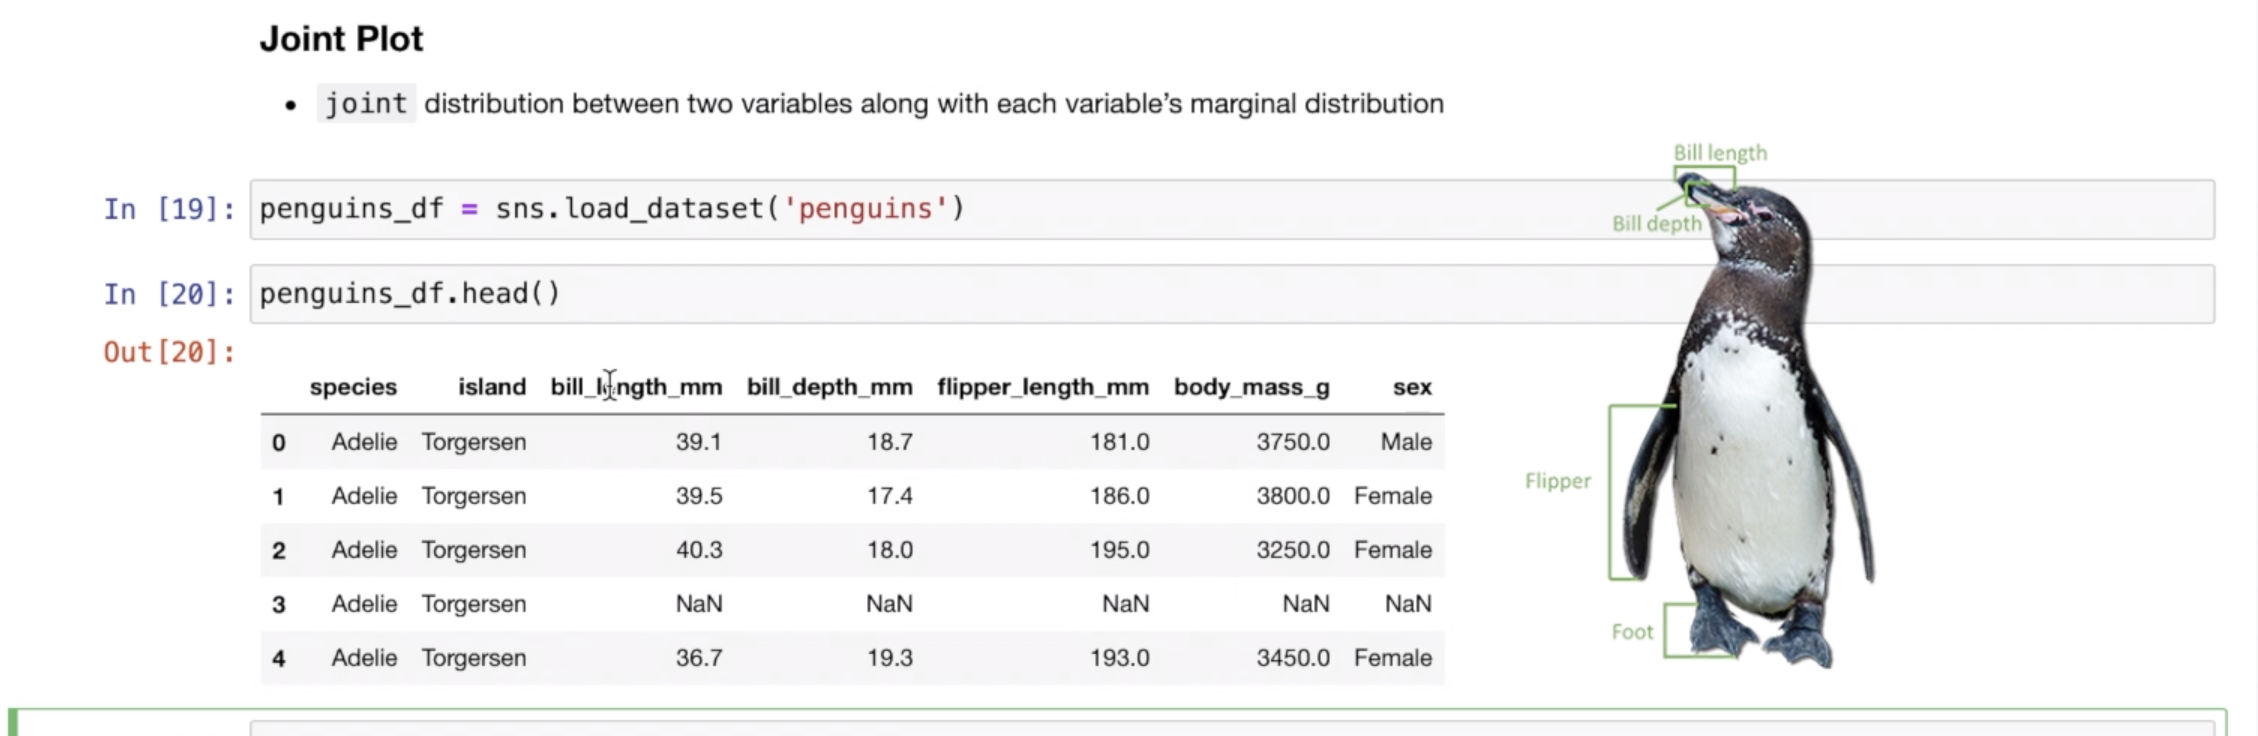

In [129]:
penguins_df = sns.load_dataset('penguins')
penguins_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


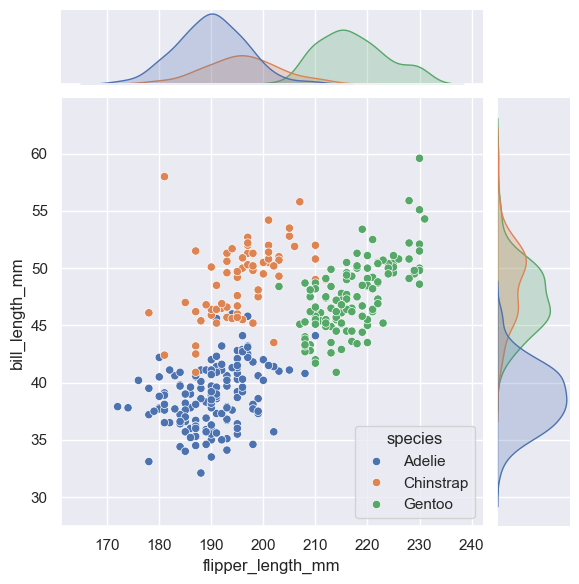

In [134]:
sns.jointplot(data  = penguins_df , x = "flipper_length_mm" , y = "bill_length_mm" , hue = 'species')

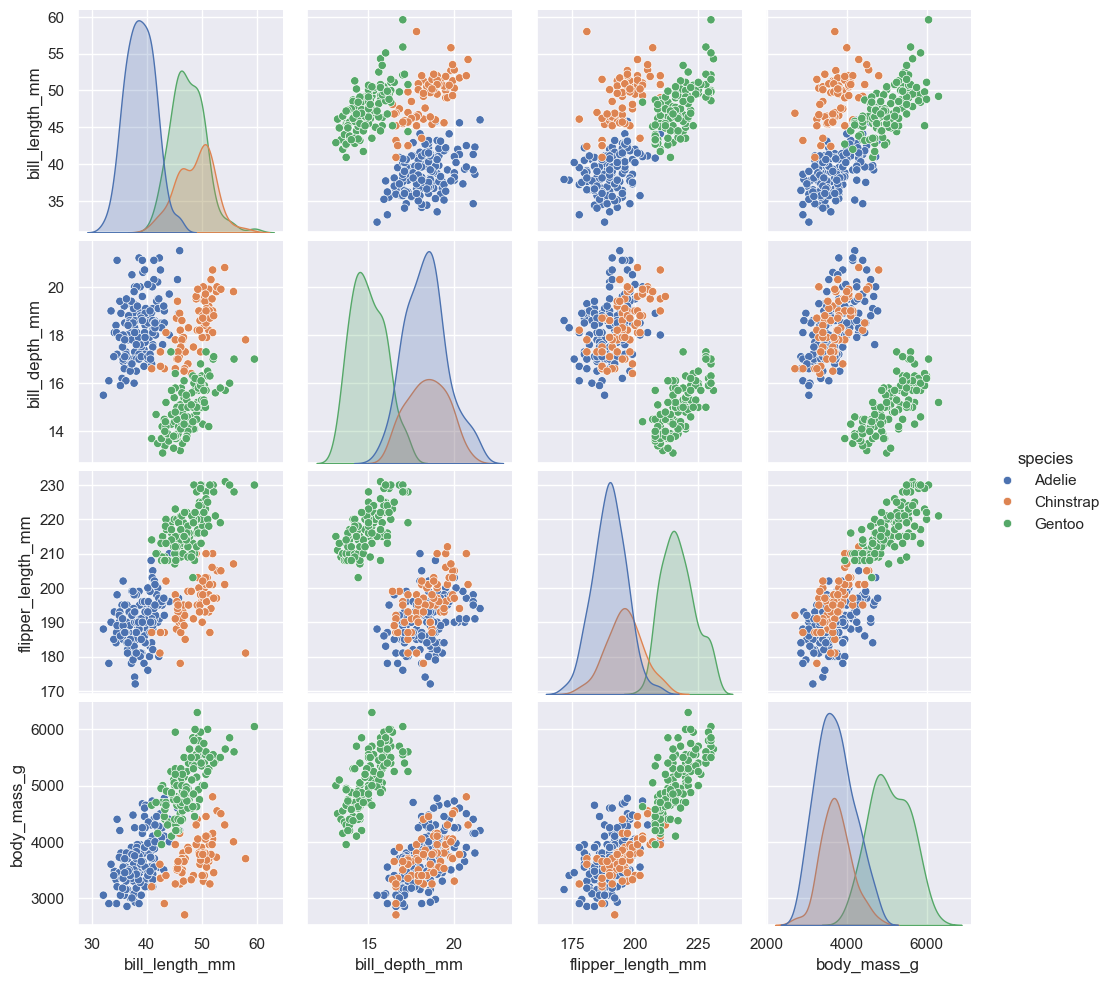

In [136]:
sns.pairplot(data = penguins_df , hue = 'species')

### ***Heatmaps***

In [141]:
flights_df = sns.load_dataset('flights')
flights_df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [153]:
flights = pd.pivot_table(flights_df , index = 'month' ,columns = 'year' ,  values = 'passengers',observed=False)
flights.head()

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112.0,115.0,145.0,171.0,196.0,204.0,242.0,284.0,315.0,340.0,360.0,417.0
Feb,118.0,126.0,150.0,180.0,196.0,188.0,233.0,277.0,301.0,318.0,342.0,391.0
Mar,132.0,141.0,178.0,193.0,236.0,235.0,267.0,317.0,356.0,362.0,406.0,419.0
Apr,129.0,135.0,163.0,181.0,235.0,227.0,269.0,313.0,348.0,348.0,396.0,461.0
May,121.0,125.0,172.0,183.0,229.0,234.0,270.0,318.0,355.0,363.0,420.0,472.0


<Axes: xlabel='year', ylabel='month'>

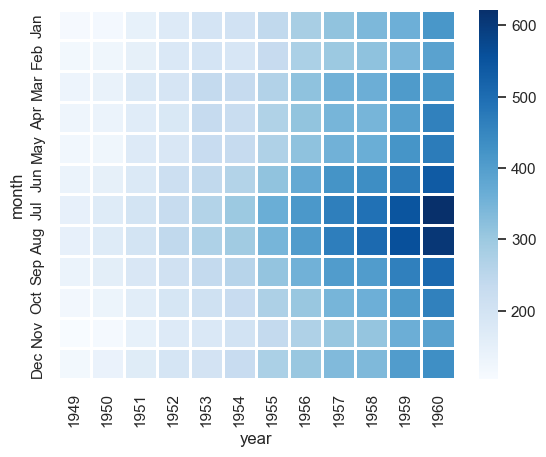

In [161]:
sns.heatmap(data  = flights , cmap = 'Blues', linewidths = 1 )

### ***Project: Nutrition Data Visualization on 80 cereal on production***

In [164]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [168]:
cereal_df = pd.read_csv('./cereal.csv')
cereal_df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [191]:
#irrelevent fields 
fields = ['weight' , 'cups' , 'rating' , 'shelf' , 'name' , 'mfr' , 'type']
new_cereal_df = cereal_df.drop(fields , axis = 1)
new_cereal_df.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins
0,70,4,1,130,10.0,5.0,6,280,25
1,120,3,5,15,2.0,8.0,8,135,0
2,70,4,1,260,9.0,7.0,5,320,25
3,50,4,0,140,14.0,8.0,0,330,25
4,110,2,2,200,1.0,14.0,8,-1,25


In [195]:
# corr()

cearal_corr = new_cereal_df.corr() 
cearal_corr


,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins
calories,1.000000,0.019066,0.498610,0.300649,-0.293413,0.250681,0.562340,-0.066609,0.265356
protein,0.019066,1.000000,0.208431,-0.054674,0.500330,-0.130864,-0.329142,0.549407,0.007335
fat,0.498610,0.208431,1.000000,-0.005407,0.016719,-0.318043,0.270819,0.193279,-0.031156
sodium,0.300649,-0.054674,-0.005407,1.000000,-0.070675,0.355983,0.101451,-0.032603,0.361477
fiber,-0.293413,0.500330,0.016719,-0.070675,1.000000,-0.356083,-0.141205,0.903374,-0.032243
carbo,0.250681,-0.130864,-0.318043,0.355983,-0.356083,1.000000,-0.331665,-0.349685,0.258148
sugars,0.562340,-0.329142,0.270819,0.101451,-0.141205,-0.331665,1.000000,0.021696,0.125137
potass,-0.066609,0.549407,0.193279,-0.032603,0.903374,-0.349685,0.021696,1.000000,0.020699
vitamins,0.265356,0.007335,-0.031156,0.361477,-0.032243,0.258148,0.125137,0.020699,1.000000


In [229]:
adjusted_cearal_corr = cearal_corr.iloc[1:,:-1]
adjusted_cearal_corr

,calories,protein,fat,sodium,fiber,carbo,sugars,potass
protein,0.019066,1.000000,0.208431,-0.054674,0.500330,-0.130864,-0.329142,0.549407
fat,0.498610,0.208431,1.000000,-0.005407,0.016719,-0.318043,0.270819,0.193279
sodium,0.300649,-0.054674,-0.005407,1.000000,-0.070675,0.355983,0.101451,-0.032603
fiber,-0.293413,0.500330,0.016719,-0.070675,1.000000,-0.356083,-0.141205,0.903374
carbo,0.250681,-0.130864,-0.318043,0.355983,-0.356083,1.000000,-0.331665,-0.349685
sugars,0.562340,-0.329142,0.270819,0.101451,-0.141205,-0.331665,1.000000,0.021696
potass,-0.066609,0.549407,0.193279,-0.032603,0.903374,-0.349685,0.021696,1.000000
vitamins,0.265356,0.007335,-0.031156,0.361477,-0.032243,0.258148,0.125137,0.020699


In [209]:
ones_corr = np.ones_like(cearal_corr, dtype = bool)
ones_corr

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True]])

In [211]:
mask = np.triu(ones_corr)
mask

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True,  True],
       [False, False, False, False, False, False, False,  True,  True],
       [False, False, False, False, False, False, False, False,  True]])

In [217]:
adjusted_mask = mask[1: , : -1]
adjusted_mask

array([[False,  True,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True],
       [False, False, False, False, False, False, False,  True],
       [False, False, False, False, False, False, False, False]])

[Text(0, 0.5, 'PROTEIN'),
 Text(0, 1.5, 'FAT'),
 Text(0, 2.5, 'SODIUM'),
 Text(0, 3.5, 'FIBER'),
 Text(0, 4.5, 'CARBO'),
 Text(0, 5.5, 'SUGARS'),
 Text(0, 6.5, 'POTASS'),
 Text(0, 7.5, 'VITAMINS')]

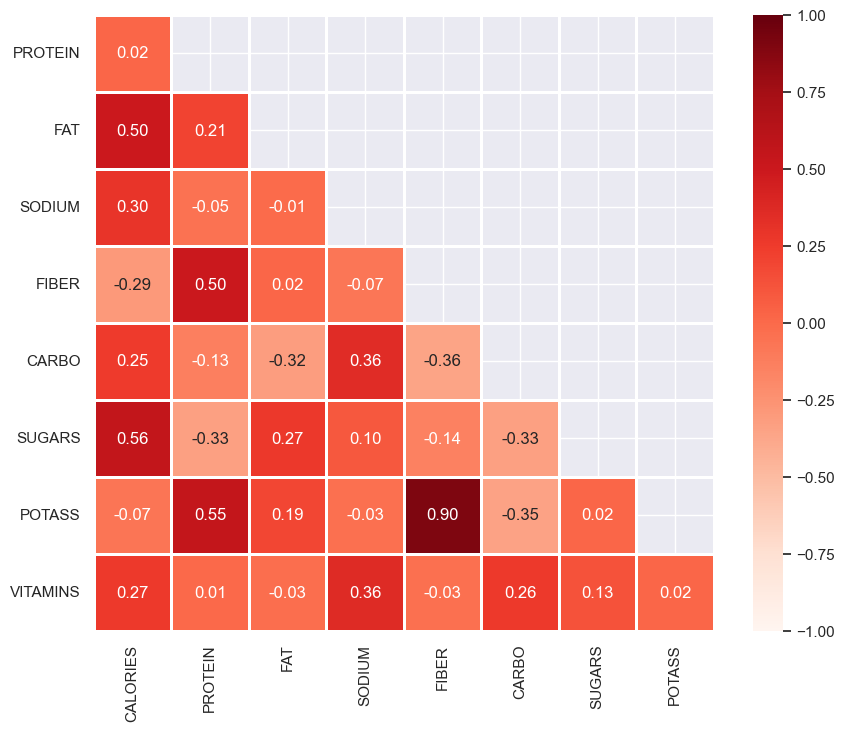

In [253]:
fig , ax = plt.subplots(figsize = (10,8))

sns.heatmap(adjusted_cearal_corr, 
            cmap = 'Reds', linewidths = 1  , 
            mask = adjusted_mask , annot = True , 
            fmt = '.2f' , vmin = -1 , vmax = 1)

ysticks = [i.upper() for i in adjusted_cearal_corr.index]
xsticks = [i.upper() for i in adjusted_cearal_corr.columns]

ax.set_xticklabels (xsticks , rotation = 90 );
ax.set_yticklabels (ysticks , rotation = 0 );